# Simulation for discussion of Hengge et al

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

n = 1000000

Start by simulating the paper DAG with linear processes

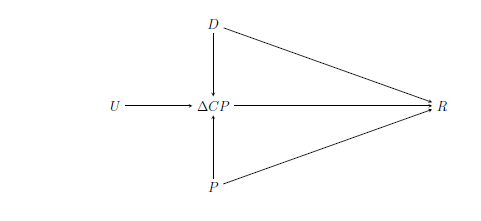

In [2]:
np.random.seed(2023-5-3)
# DAG
ev = 1*(np.random.normal(size=(n, 1))>0.8) 
u = np.random.normal(size=(n, 1))
p = np.random.normal(size=(n, 1))*ev
d = np.random.normal(size=(n, 1))
cp = u + d + p
r = 1 + d - p - cp

# Throw stuff in observable & unobservable dataframe
obs = pd.DataFrame(np.hstack([cp, ev]), columns=['cp_1', 'ev_2'])
obs['int_3'] = cp*ev
unobs = pd.DataFrame(np.hstack([u, d, p]), columns=['u', 'd', 'p'])

In [3]:
# Get true effect
mod = sm.OLS(r, sm.add_constant(unobs))
p_effect = mod.fit().params['p']
# Estimate k
k = np.var(cp[ev==1])/np.var(cp[ev==0])
# Estimate beta_1, beta_3, g
mod2 = sm.OLS(r, sm.add_constant(obs))
results2 = mod2.fit()
g = results2.params['cp_1'] + results2.params['int_3']*(k/(k-1))
print(f"True effect: {p_effect:.4f}\nEstimate: {g:.4f}")

True effect: -2.0000
Estimate: -2.0028


Add non linear interaction

In [4]:
np.random.seed(2023-5-3)
# DAG
ev = 1*(np.random.normal(size=(n, 1))>0.8) 
u = np.random.normal(size=(n, 1))
p = np.random.normal(size=(n, 1))*ev
d = np.random.normal(size=(n, 1))
cp = u + d + p + 2*p*d 
r = 1 + d - p - cp

# Throw stuff in observable & unobservable dataframe
obs = pd.DataFrame(np.hstack([cp, ev]), columns=['cp_1', 'ev_2'])
obs['int_3'] = cp*ev
unobs = pd.DataFrame(np.hstack([u, d, p]), columns=['u', 'd', 'p'])

In [5]:
# Get true effect
mod = sm.OLS(r, sm.add_constant(unobs))
p_effect = mod.fit().params['p']
# Estimate k
k = np.var(cp[ev==1])/np.var(cp[ev==0])
# Estimate beta_1, beta_3, g
mod2 = sm.OLS(r, sm.add_constant(obs))
results2 = mod2.fit()
g = results2.params['cp_1'] + results2.params['int_3']*(k/(k-1))
print(f"True effect: {p_effect:.4f}\nEstimate: {g:.4f}")

True effect: -2.0051
Estimate: -1.1988
